In [733]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
from scipy.stats import norm
from linearmodel import LinearModel
from regression_tree import RegressionTree

In [621]:
df = pd.read_csv('dataset/data.csv')

df['temp'] = 1
df2 = pd.pivot_table(df, index = 'street', columns = 'statezip', values = 'temp', aggfunc = 'first', fill_value = 0)
df = df.drop('statezip', axis = 1)
df = df.merge(df2, right_index = True, left_on = 'street')
df.drop('temp', axis = 1, inplace = True)
df = df[(df['price'] < 0.5e7) & (df['price'] > 0)]
df['log_price'] = np.log10(df['price'])
df['log_lot'] = np.log10(df['sqft_lot'])

In [622]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'country', 'WA 98001', 'WA 98002', 'WA 98003', 'WA 98004', 'WA 98005',
       'WA 98006', 'WA 98007', 'WA 98008', 'WA 98010', 'WA 98011', 'WA 98014',
       'WA 98019', 'WA 98022', 'WA 98023', 'WA 98024', 'WA 98027', 'WA 98028',
       'WA 98029', 'WA 98030', 'WA 98031', 'WA 98032', 'WA 98033', 'WA 98034',
       'WA 98038', 'WA 98039', 'WA 98040', 'WA 98042', 'WA 98045', 'WA 98047',
       'WA 98050', 'WA 98051', 'WA 98052', 'WA 98053', 'WA 98055', 'WA 98056',
       'WA 98057', 'WA 98058', 'WA 98059', 'WA 98065', 'WA 98068', 'WA 98070',
       'WA 98072', 'WA 98074', 'WA 98075', 'WA 98077', 'WA 98092', 'WA 98102',
       'WA 98103', 'WA 98105', 'WA 98106', 'WA 98107', 'WA 98108', 'WA 98109',
       'WA 98112', 'WA 98115', 'WA 98116', 'WA 98117', 'WA 98118', 'WA 98119',

<Axes: xlabel='sqft_lot', ylabel='log_price'>

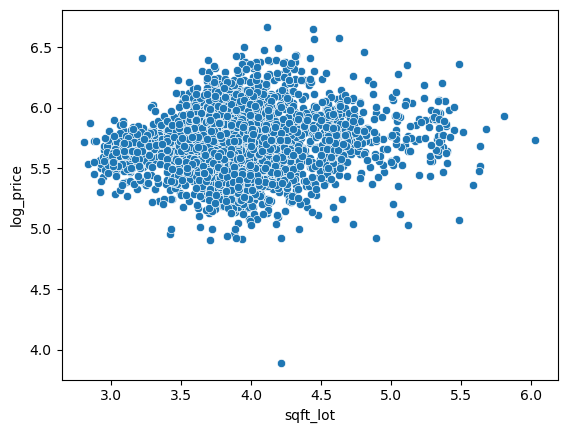

In [613]:
test = np.log10(df['sqft_lot'])
sns.scatterplot(x = test, y = df['log_price'])

<Axes: xlabel='bedrooms', ylabel='log_price'>

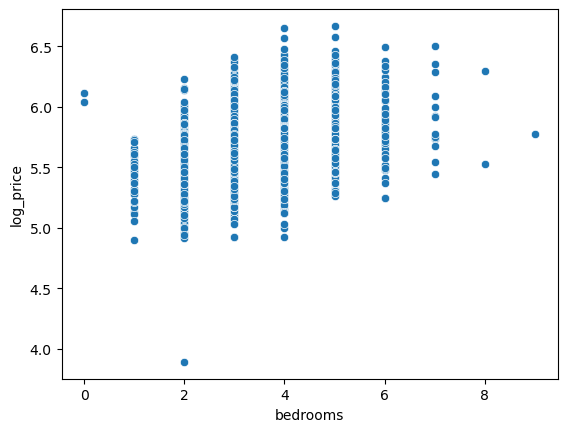

In [619]:
sns.scatterplot(x = df['bedrooms'], y = df['log_price'])

<Axes: xlabel='sqft_living', ylabel='log_price'>

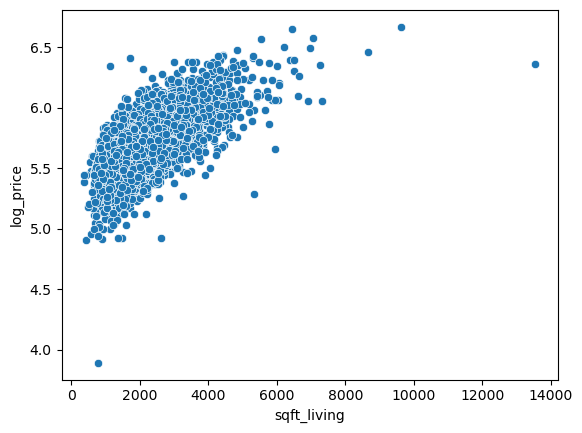

In [620]:
sns.scatterplot(x = df['sqft_living'], y = df['log_price'])

In [623]:
split = 0.8
train_index = random.sample(range(len(df)), math.floor(split * len(df)))

train_set = df.iloc[train_index]
train_set = train_set.reset_index(drop = True)
test_set = df.drop(df.index[train_index])
test_set = test_set.reset_index(drop = True)

In [719]:
not_input = ['date', 'price', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'country', 'log_price', 'sqft_lot', 'bathrooms', 'bedrooms']
#input = ['bathrooms', 'sqft_living']
#lm = Model(train_set.loc[:, train_set.columns.isin(input)], train_set['price'])
lm = LinearModel(train_set.loc[:, ~train_set.columns.isin(not_input)], train_set['log_price'])

In [720]:
lm.fit()

In [730]:
#pred = lm.predict(test_set.loc[:, test_set.columns.isin(input)])
pred = lm.predict(test_set.loc[:, ~test_set.columns.isin(not_input)])
pred2 = lm.predict(train_set.loc[:, ~train_set.columns.isin(not_input)])

In [731]:
mse, r_2 =  lm.metrics(test_set['price'], 10 ** pred)
mse2, r_2_2 = lm.metrics(train_set['price'], 10 ** pred2)

In [732]:
math.sqrt(mse), math.sqrt(mse2)

(172354.3628632277, 338213.0235854666)

In [729]:
test_set['price'].mean(), train_set['price'].mean()

(np.float64(527851.3578849736), np.float64(553087.8260861625))

In [663]:
resd = test_set['price'] - 10 ** pred

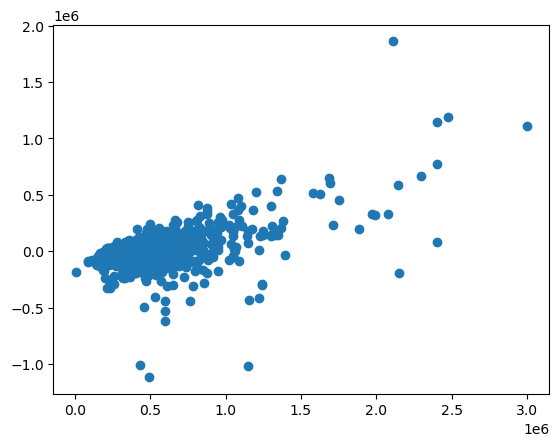

In [677]:
plt.scatter(test_set['price'], resd)

<Axes: xlabel='price', ylabel='price'>

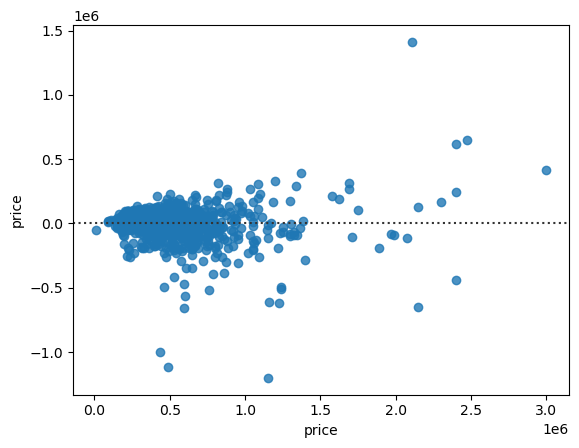

In [691]:
sns.residplot(x = test_set['price'], y = resd)

<Axes: xlabel='price', ylabel='price'>

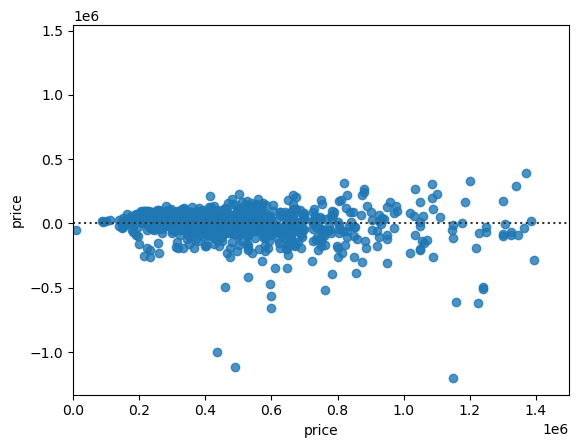

In [693]:
plt.gca().set_xlim(0, 1.5e6)
sns.residplot(x = test_set['price'], y = resd)

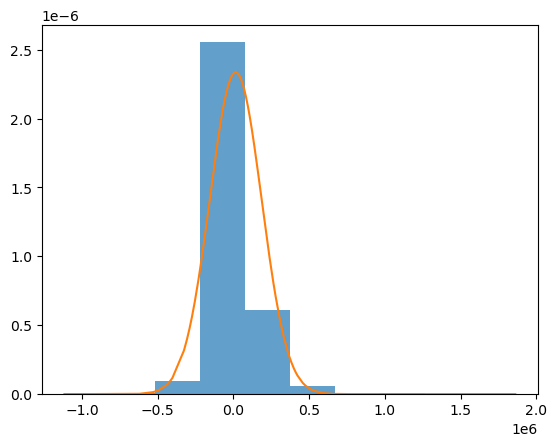

In [707]:
plt.hist(resd, alpha = 0.7, density = True)
resd = resd.sort_values()
p = norm.pdf(resd, resd.mean(), resd.std())
plt.plot(resd, p)
plt.show()

<Axes: >

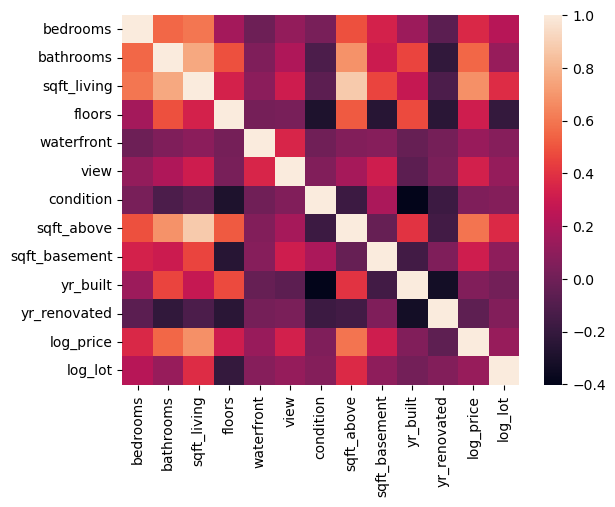

In [724]:
input = ['log_price', 'bedrooms', 'bathrooms', 'sqft_living', 'log_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated']

corr = train_set.loc[:, train_set.columns.isin(input)].corr()
sns.heatmap(corr)

In [734]:
rt = RegressionTree(train_set.loc[:, ~train_set.columns.isin(not_input)], train_set['log_price'])

In [735]:
rt.fit()

In [736]:
pred_rt = rt.predict(test_set.loc[:, ~test_set.columns.isin(not_input)])

In [738]:
math.sqrt(rt.metrics(test_set['price'], 10 ** pred_rt))

232265.09855514127